In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
import yfinance as yf # for proof of concept
from tools import *

code adapted from: https://www.geeksforgeeks.org/time-series-forecasting-using-recurrent-neural-networks-rnn-in-tensorflow/

In [2]:
# # Proof of concept data
# start_date = dt.datetime(2020,4,1)
# end_date = dt.datetime(2023,4,1)
# data = yf.download("GOOGL", start=start_date, end=end_date)

In [3]:
data = read_merged_data()
data = pd.DataFrame(data[0])[:600]
# remove rows where last tapes price is nan
data = data.dropna(subset=["Last Tapes Price"])


Opening UoB_Set01_2025-01-02tapes.csv


In [4]:
print(data)

                                                    Incoming bid  \
combined_time                                                      
2025-01-02 08:00:10                              [193 15][267 5]   
2025-01-02 08:00:11                [118 10][267 3][96 10][46 10]   
2025-01-02 08:00:12                 [92 10][127 1][264 1][181 1]   
2025-01-02 08:00:13                                                
2025-01-02 08:00:14                                      [10 10]   
...                                                          ...   
2025-01-02 08:09:55  [258 4][91 16][260 2] [258 2][269 6][143 2]   
2025-01-02 08:09:56                               [112 16][43 2]   
2025-01-02 08:09:57     [269 5][91 2][180 6][48 2][256 6][225 6]   
2025-01-02 08:09:58                  [228 6][47 6][216 2][54 16]   
2025-01-02 08:09:59   [103 6][249 3][269 3][214 6][102 16][47 6]   

                                                          Incoming ask  \
combined_time                            

In [5]:
print(data.columns)

Index(['Incoming bid', 'Incoming ask', 'Outgoing bid', 'Outgoing ask', 'alpha',
       'beta', 'LOB', 'mid_price', 'low_ask', 'high_bid', 'Volume',
       'Tapes Price', 'Last Tapes Price'],
      dtype='object')


In [6]:
# Setting 80 percent data for training
training_data_len = math.ceil(len(data) * .8)
training_data_len 
 
#Splitting the dataset
train_data = data[:training_data_len]
test_data = data[training_data_len:]
print(len(train_data), len(test_data))

472 118


In [7]:
# # proof of concept data
# dataset_train = train_data.Open.values

In [8]:
dataset_train = train_data["Last Tapes Price"].values
print(dataset_train)

[267.         267.66666667 270.         267.         267.
 267.         267.         267.         265.         263.66666667
 263.66666667 264.         263.57142857 263.57142857 267.33333333
 267.33333333 261.66666667 270.         270.         270.
 270.         270.         270.         270.         270.
 270.         263.         260.2        259.2        259.2
 259.2        259.         259.         259.         257.
 257.         254.5        257.66666667 258.         258.
 266.         264.         263.33333333 263.33333333 263.
 263.         263.         263.         261.         261.
 259.         259.         259.         259.         259.
 260.         260.         260.         263.         263.
 263.         263.         256.         256.         256.
 254.71428571 254.71428571 262.75       263.         263.
 263.         263.         263.         267.         267.
 267.         267.         263.66666667 260.         260.
 255.33333333 257.5        257.5        264.         26

In [9]:
# Reshaping 1D to 2D array
dataset_train = np.reshape(dataset_train, (-1,1)) 
dataset_train.shape

(472, 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
# scaling dataset
scaled_train = scaler.fit_transform(dataset_train)
 
print(scaled_train[:5])

[[0.84615385]
 [0.88034188]
 [1.        ]
 [0.84615385]
 [0.84615385]]


In [11]:
# # proof of concept data

# # Selecting Open Price values
# dataset_test = test_data.Open.values
# # Reshaping 1D to 2D array
# dataset_test = np.reshape(dataset_test, (-1,1))  
# # Normalizing values between 0 and 1
# scaled_test = scaler.fit_transform(dataset_test)  
# print(*scaled_test[:5])

In [12]:
 # Selecting tapes Price values
dataset_test = test_data["Last Tapes Price"].values
# Reshaping 1D to 2D array
dataset_test = np.reshape(dataset_test, (-1,1))  
# Normalizing values between 0 and 1
scaled_test = scaler.fit_transform(dataset_test)  
print(*scaled_test[:5])

[1.] [1.] [0.70666667] [0.70666667] [0.70666667]


In [13]:
window = 50
X_train = []
y_train = []
for i in range(window, len(scaled_train)):
    X_train.append(scaled_train[i-window:i, 0])
    y_train.append(scaled_train[i, 0])
    if i <= (window+1):
        print(X_train)
        print(y_train)
        print()

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.67032967, 0.67032967, 0.86324786,
       0.86324786, 0.57264957, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.64102564, 0.4974359 , 0.44615385, 0.44615385,
       0.44615385, 0.43589744, 0.43589744, 0.43589744, 0.33333333,
       0.33333333, 0.20512821, 0.36752137, 0.38461538, 0.38461538,
       0.79487179, 0.69230769, 0.65811966, 0.65811966, 0.64102564,
       0.64102564, 0.64102564, 0.64102564, 0.53846154, 0.53846154])]
[0.4358974358974361]

[array([0.84615385, 0.88034188, 1.        , 0.84615385, 0.84615385,
       0.84615385, 0.84615385, 0.84615385, 0.74358974, 0.67521368,
       0.67521368, 0.69230769, 0.67032967, 0.67032967, 0.86324786,
       0.86324786, 0.57264957, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.   

In [14]:
X_test = []
y_test = []
for i in range(window, len(scaled_test)):
    X_test.append(scaled_test[i-window:i, 0])
    y_test.append(scaled_test[i, 0])

In [15]:
 
# The data is converted to Numpy array
X_train, y_train = np.array(X_train), np.array(y_train)
 
#Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))
print("X_train :",X_train.shape,"y_train :",y_train.shape)

X_train : (422, 50, 1) y_train : (422, 1)


In [16]:
# The data is converted to numpy array
X_test, y_test = np.array(X_test), np.array(y_test)
 
#Reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))
print("X_test :",X_test.shape,"y_test :",y_test.shape)

X_test : (68, 50, 1) y_test : (68, 1)


In [17]:
# importing libraries
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout
from keras.layers import GRU, Bidirectional
from keras.optimizers import SGD
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [18]:
# initializing the RNN
regressor = Sequential()
 
# adding RNN layers and dropout regularization
regressor.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True,
                        input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
 
regressor.add(SimpleRNN(units = 50, 
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add(SimpleRNN(units = 50,
                        activation = "tanh",
                        return_sequences = True))
 
regressor.add( SimpleRNN(units = 50))
 
# adding the output layer
regressor.add(Dense(units = 1,activation='sigmoid'))
 
# compiling RNN
regressor.compile(optimizer = SGD(learning_rate=0.01,
                                  decay=1e-6, 
                                  momentum=0.9, 
                                  nesterov=True), 
                  loss = "mean_squared_error")
 
# fitting the model
regressor.fit(X_train, y_train, epochs = 20, batch_size = 2)
regressor.summary()

Epoch 1/20
211/211 [==============================] - 81s 368ms/step - loss: 0.0397
Epoch 2/20
211/211 [==============================] - 79s 375ms/step - loss: 0.0308
Epoch 3/20
211/211 [==============================] - 71s 338ms/step - loss: 0.0248
Epoch 4/20
211/211 [==============================] - 65s 307ms/step - loss: 0.0241
Epoch 5/20
211/211 [==============================] - 72s 343ms/step - loss: 0.0224
Epoch 6/20
211/211 [==============================] - 70s 330ms/step - loss: 0.0207
Epoch 7/20
211/211 [==============================] - 73s 343ms/step - loss: 0.0191
Epoch 8/20
211/211 [==============================] - 78s 369ms/step - loss: 0.0169
Epoch 9/20
211/211 [==============================] - 67s 315ms/step - loss: 0.0165
Epoch 10/20
211/211 [==============================] - 84s 400ms/step - loss: 0.0155
Epoch 11/20
211/211 [==============================] - 81s 384ms/step - loss: 0.0152
Epoch 12/20
211/211 [==============================] - 76s 359ms/step - lo

In [23]:
#Initialising the model
regressorLSTM = Sequential()
 
#Adding LSTM layers
regressorLSTM.add(LSTM(50, 
                       return_sequences = True, 
                       input_shape = (X_train.shape[1],1)))
regressorLSTM.add(LSTM(50, 
                       return_sequences = False))
regressorLSTM.add(Dense(25))
 
#Adding the output layer
regressorLSTM.add(Dense(1))
 
#Compiling the model
regressorLSTM.compile(optimizer = 'adam',
                      loss = 'mean_squared_error',
                      metrics = ["accuracy"])
 
#Fitting the model
regressorLSTM.fit(X_train, 
                  y_train, 
                  batch_size = 1, 
                  epochs = 12)
regressorLSTM.summary()

Epoch 1/12
422/422 [==============================] - 13s 23ms/step - loss: 0.0331 - accuracy: 0.0118
Epoch 2/12
422/422 [==============================] - 9s 22ms/step - loss: 0.0216 - accuracy: 0.0118
Epoch 3/12
422/422 [==============================] - 10s 23ms/step - loss: 0.0154 - accuracy: 0.0118
Epoch 4/12
422/422 [==============================] - 10s 23ms/step - loss: 0.0145 - accuracy: 0.0118
Epoch 5/12
422/422 [==============================] - 10s 24ms/step - loss: 0.0145 - accuracy: 0.0118
Epoch 6/12
422/422 [==============================] - 10s 24ms/step - loss: 0.0134 - accuracy: 0.0118
Epoch 7/12
422/422 [==============================] - 10s 24ms/step - loss: 0.0140 - accuracy: 0.0118
Epoch 8/12
422/422 [==============================] - 10s 24ms/step - loss: 0.0140 - accuracy: 0.0118
Epoch 9/12
422/422 [==============================] - 10s 24ms/step - loss: 0.0143 - accuracy: 0.0118
Epoch 10/12
422/422 [==============================] - 10s 24ms/step - loss: 0.0128

In [28]:
#Initialising the model
regressorGRU = Sequential()
 
# GRU layers with Dropout regularisation
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     input_shape=(X_train.shape[1],1),
                     activation='tanh'))
regressorGRU.add(Dropout(0.2))
 
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))
 
regressorGRU.add(GRU(units=50, 
                     return_sequences=True,
                     activation='tanh'))
 
regressorGRU.add(GRU(units=50, 
                     activation='tanh'))
 
# The output layer
regressorGRU.add(Dense(units=1,
                       activation='relu'))
# Compiling the RNN
regressorGRU.compile(optimizer=SGD(learning_rate=0.01, 
                                   decay=1e-7, 
                                   momentum=0.9, 
                                   nesterov=False),
                     loss='mean_squared_error')
 
# Fitting the data
regressorGRU.fit(X_train,y_train,epochs=20,batch_size=1)
regressorGRU.summary()

Epoch 1/20
422/422 [==============================] - 18s 32ms/step - loss: 0.0450
Epoch 2/20
422/422 [==============================] - 14s 33ms/step - loss: 0.0366
Epoch 3/20
422/422 [==============================] - 14s 32ms/step - loss: 0.0325
Epoch 4/20
422/422 [==============================] - 14s 32ms/step - loss: 0.0293
Epoch 5/20
422/422 [==============================] - 14s 34ms/step - loss: 0.0260
Epoch 6/20
422/422 [==============================] - 14s 32ms/step - loss: 0.0259
Epoch 7/20
422/422 [==============================] - 14s 32ms/step - loss: 0.0215
Epoch 8/20
422/422 [==============================] - 14s 32ms/step - loss: 0.0230
Epoch 9/20
422/422 [==============================] - 14s 32ms/step - loss: 0.0196
Epoch 10/20
422/422 [==============================] - 14s 32ms/step - loss: 0.0199
Epoch 11/20
422/422 [==============================] - 14s 33ms/step - loss: 0.0192
Epoch 12/20
422/422 [==============================] - 14s 32ms/step - loss: 0.0175
E

In [29]:
 
# predictions with X_test data
y_RNN = regressor.predict(X_test)
y_LSTM = regressorLSTM.predict(X_test)
y_GRU = regressorGRU.predict(X_test)

3/3 [==============================] - 2s 17ms/step


In [30]:
 
# scaling back from 0-1 to original
y_RNN_O = scaler.inverse_transform(y_RNN) 
y_LSTM_O = scaler.inverse_transform(y_LSTM) 
y_GRU_O = scaler.inverse_transform(y_GRU)

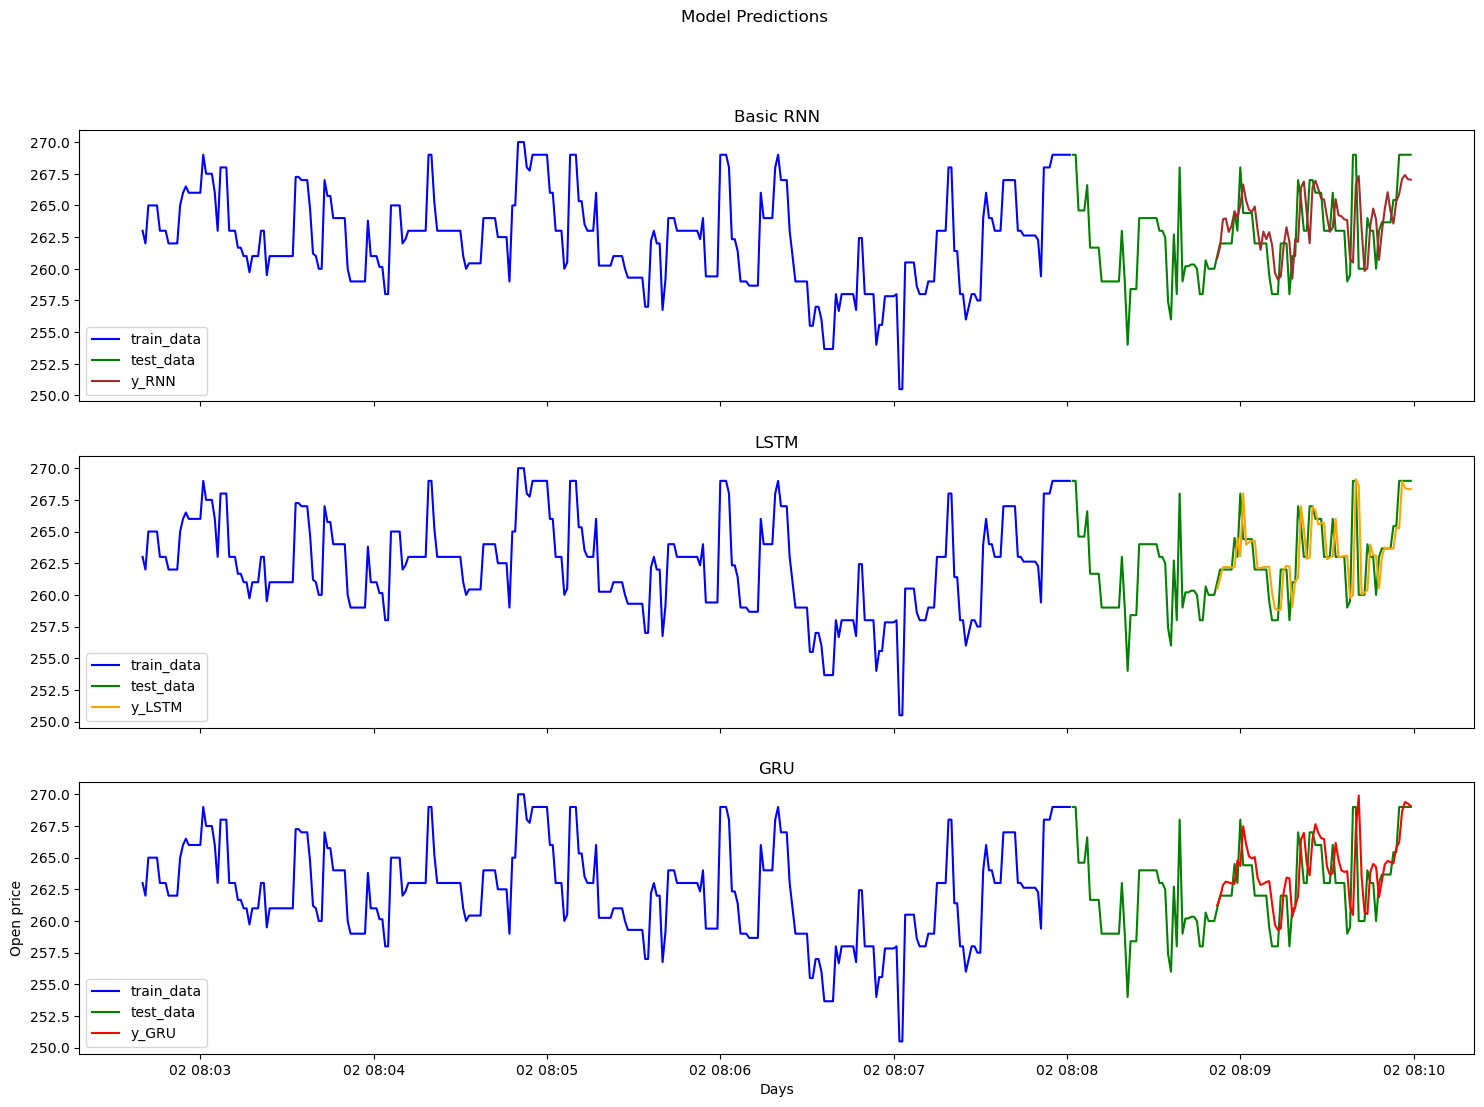

In [33]:
 
fig, axs = plt.subplots(3,figsize =(18,12),sharex=True, sharey=True)
fig.suptitle('Model Predictions')
 
#Plot for RNN predictions
axs[0].plot(train_data.index[150:], train_data["Last Tapes Price"][150:], label = "train_data", color = "b")
axs[0].plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs[0].plot(test_data.index[50:], y_RNN_O, label = "y_RNN", color = "brown")
axs[0].legend()
axs[0].title.set_text("Basic RNN")
 
#Plot for LSTM predictions
axs[1].plot(train_data.index[150:], train_data["Last Tapes Price"][150:], label = "train_data", color = "b")
axs[1].plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs[1].plot(test_data.index[50:], y_LSTM_O, label = "y_LSTM", color = "orange")
axs[1].legend()
axs[1].title.set_text("LSTM")
 
#Plot for GRU predictions
axs[2].plot(train_data.index[150:], train_data["Last Tapes Price"][150:], label = "train_data", color = "b")
axs[2].plot(test_data.index, test_data["Last Tapes Price"], label = "test_data", color = "g")
axs[2].plot(test_data.index[50:], y_GRU_O, label = "y_GRU", color = "red")
axs[2].legend()
axs[2].title.set_text("GRU")
 
plt.xlabel("Days")
plt.ylabel("Open price")
 
plt.show()